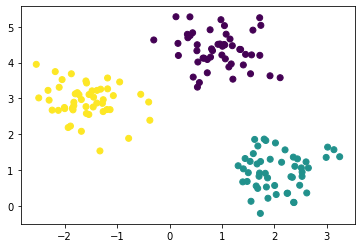

In [8]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
X,y = make_blobs(n_samples = 150,
                 n_features = 2,
                 centers = 3,
                 cluster_std = 0.5,
                 shuffle = True,
                 random_state = 0)
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

In [9]:
import numpy as np
import math

#欧几里得距离
def euclidean(vector1, vector2):
    dist = [(a-b)**2 for (a, b) in zip(vector1, vector2)]
    dist = math.sqrt(sum(dist))
    return dist

#随机生成k个中心
def RandomCenters(data, k):
    n = data.shape[0]
    centerIndex = np.random.choice(range(n), size=k, replace=False)
    centers = data[centerIndex]
    return centers

def KMeans(data, k):
    Centers = RandomCenters(data, k)
    n, m = data.shape
    DistMatrix = np.zeros((n, 2)) #构建n*2的矩阵
    centerChanged = True
    while centerChanged == True:
        centerChanged = False
        for i in range(n):
            minDist = np.inf #无穷大
            minIndex = -1
            for j in range(k):
                dist = euclidean(data[i, :], Centers[j, :]) #计算数据与随机数之间的欧几里得距离
                if dist < minDist: #若发现离中心点更近，则替换
                    minDist = dist
                    minIndex = j
            if DistMatrix[i, 0] != minIndex:
                centerChanged = True
            DistMatrix[i, 0] = minIndex   #存储的是索引
            DistMatrix[i, 1] = minDist    #存储的是距离
        if centerChanged == True:  # 若聚类中心有变化，则更新聚类中心
            for i in range(k):
                dataMean = data[DistMatrix[:, 0] == i]  # dataMean中是相同类簇的样本
                Centers[i] = np.mean(dataMean, axis=0)
    return Centers

Centers = KMeans(X,3)
Centers

array([[-1.5947298 ,  2.92236966],
       [ 2.06521743,  0.96137409],
       [ 0.9329651 ,  4.35420712]])

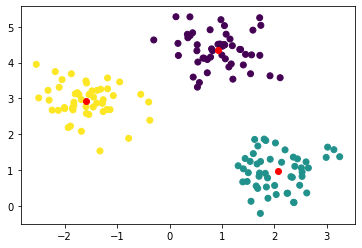

In [10]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.scatter(Centers[0,0],Centers[0,1],color = 'r')
plt.scatter(Centers[1,0],Centers[1,1],color = 'r')
plt.scatter(Centers[2,0],Centers[2,1],color = 'r')